# run time distance detection

In [2]:

# Import necessary modules
from ultralytics import YOLO
import cv2
import pyttsx3
import numpy as np
import time
import matplotlib.pyplot as plt

In [8]:
# Initialize text-to-speech engine
engine = pyttsx3.init()


In [9]:

# Initialize the YOLO model
model = YOLO()



In [10]:
# Open a connection to the webcam (0 is usually the default camera)
cap = cv2.VideoCapture(0)


In [11]:

# Function to calculate the approximate distance (this is a simple placeholder)
def calculate_distance(w, h):
    # Example distance calculation; replace with real-world calibration
    distance = (2 * 3.14 * 180) / (w + h * 360) * 1000 + 3
    return distance * 0.0254



In [ ]:
# Start real-time processing
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame capture was successful
    if ret:
        # Perform object detection
        results = model.predict(source=frame, conf=0.25)
        boxes = results[0].boxes.xyxy.tolist()  # Get bounding boxes
        classes = list(map(results[0].names.get, [int(cls) for cls in results[0].boxes.cls]))

        # Iterate through detected objects
        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box[:4])
            w = x2 - x1
            h = y2 - y1
            distance = calculate_distance(w, h)
            label = f"{classes[i]}: {int(distance)} meters"
            
            # Draw bounding box and label on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            
            # Provide audio feedback
            engine.say(f"{classes[i]} detected at {int(distance)} meters")
        
        # Display the resulting frame
        cv2.imshow('Vision Assistive System', frame)
        
        # Process the audio
        engine.runAndWait()
        
        # Break the loop on 'q' key press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    else:
        print("Failed to capture frame")
        break




0: 480x640 1 person, 149.8ms
Speed: 5.5ms preprocess, 149.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 120.1ms
Speed: 2.0ms preprocess, 120.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 (no detections), 150.2ms
Speed: 4.0ms preprocess, 150.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 2 persons, 186.8ms
Speed: 3.9ms preprocess, 186.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 169.0ms
Speed: 3.9ms preprocess, 169.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 2 persons, 165.6ms
Speed: 3.0ms preprocess, 165.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 2 persons, 177.9ms
Speed: 2.0ms preprocess, 177.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 person, 166.7ms
Speed: 4.0ms preprocess, 166.7ms inference, 2.0ms postprocess pe

In [ ]:
# Release the capture and destroy all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# processed image samples

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (

0: 480x640 1 person, 184.3ms
Speed: 4.0ms preprocess, 184.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


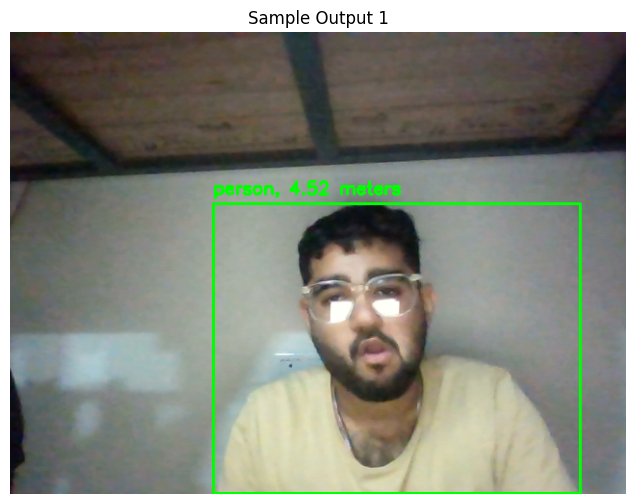


0: 480x640 1 person, 143.4ms
Speed: 3.0ms preprocess, 143.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


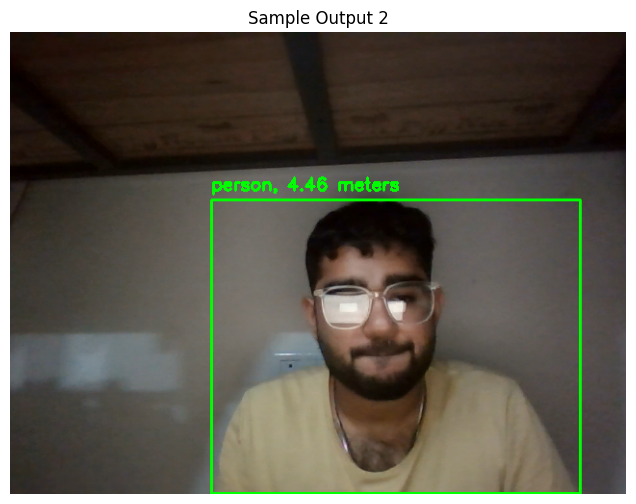


0: 480x640 1 person, 125.4ms
Speed: 2.9ms preprocess, 125.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


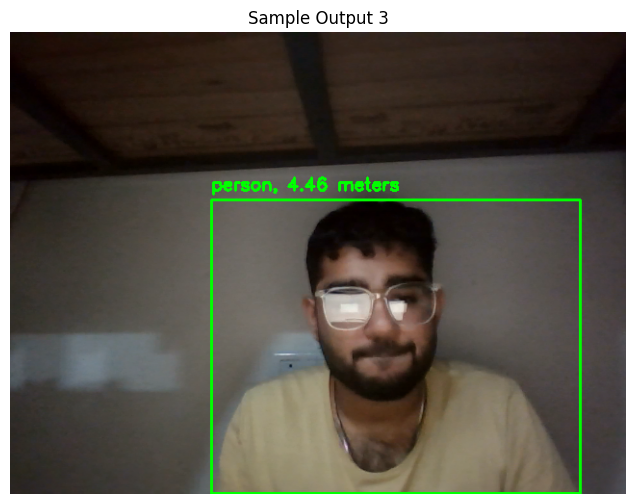


0: 480x640 1 person, 219.7ms
Speed: 3.3ms preprocess, 219.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


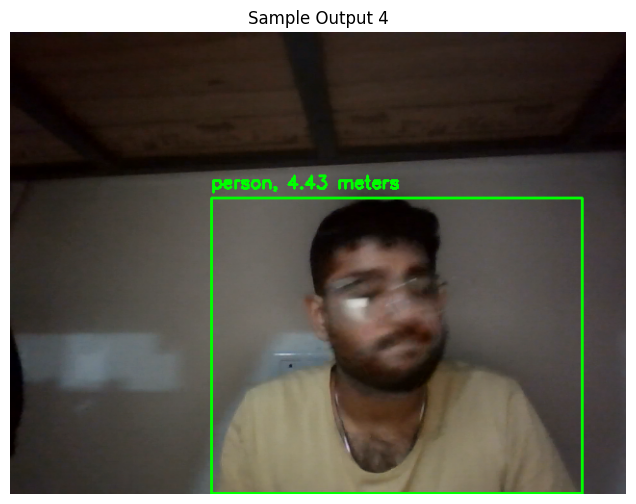


0: 480x640 1 person, 153.2ms
Speed: 2.0ms preprocess, 153.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


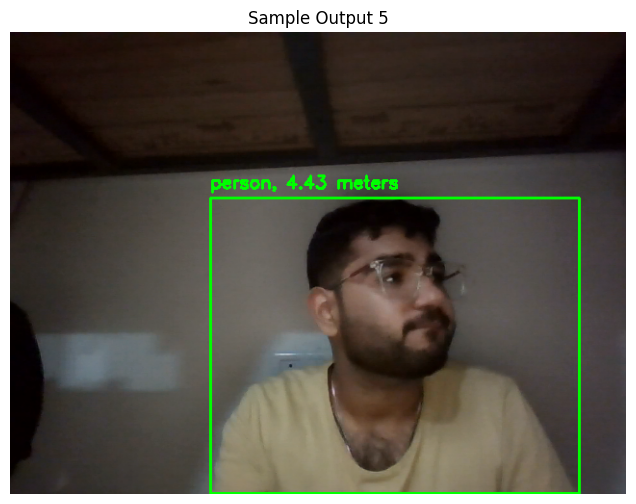

In [1]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

def print_sample_output_with_distance(num_samples=1, focal_length=800, real_height=1.7):
    # Initialize YOLO model
    model = YOLO()

    # Open the webcam
    cap = cv2.VideoCapture(0)

    samples = 0

    while samples < num_samples:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        # Run object detection
        results = model.predict(source=frame, conf=0.25)

        # Extract detected boxes and classes
        boxes = results[0].boxes.xyxy.tolist()
        classes = list(map(results[0].names.get, [int(cls) for cls in results[0].boxes.cls]))

        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = map(int, box[:4])
            label = classes[i]

            # Focus only on persons (class name 'person')
            if label == 'person':
                # Estimate distance to the person
                height = y2 - y1
                distance = (focal_length * real_height) / height

                # Draw bounding box and label on the frame
                cv2.rectangle(frame, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
                cv2.putText(frame, f"{label}, {distance:.2f} meters", 
                            (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        # Convert the frame to RGB (for displaying with matplotlib)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.figure(figsize=(10, 6))
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f"Sample Output {samples + 1}")
        plt.show()

        samples += 1

    # Release the webcam resource
    cap.release()
    cv2.destroyAllWindows()

# Call the function to print 2 sample outputs
print_sample_output_with_distance(num_samples=5)